<a href="https://colab.research.google.com/github/Aayush6377/Machine-Learning-Lab-programs-Sem-6/blob/main/Lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Write a Python Program to implement K-Means Clustering.**

In [37]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [38]:
#Load the Wine dataset
df = load_wine(as_frame=True)
df = df.frame
df.drop('target', axis =1, inplace=True)
print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [39]:
#Standardize the dataset
scaler =StandardScaler()
features =scaler.fit_transform(df)
scaled_df =pd.DataFrame(features,columns=df.columns)
print(scaled_df.head(2))

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051                      1.113449  0.965242  


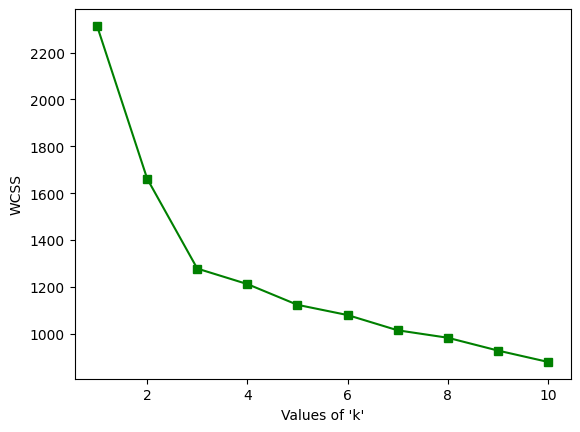

In [40]:
#Elbow Method to determine number of clusters
x=scaled_df.values
wcss = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss[i] = kmeans.inertia_

plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

In [41]:
#Apply K-Means Clustering
model=KMeans(n_clusters=3, random_state=42)
model.fit(x)

KMeans(n_clusters=3, random_state=42)

In [36]:
#Reducing dataset
pca=PCA(n_components=2)
reduced=pd.DataFrame(data=pca.fit_transform(x),columns=['PCA1','PCA2'])
print(reduced.head())

       PCA1      PCA2
0  3.316751  1.443463
1  2.209465 -0.333393
2  2.516740  1.031151
3  3.757066  2.756372
4  1.008908  0.869831


In [33]:
#Get cluster centers and labels
centers=pca.transform(model.cluster_centers_)
labels=model.labels_
print("centers: ",centers[:5])
print("labels: ",labels[:5])

centers:  [[-0.03695661 -1.77223945]
 [-2.72003575  1.12565126]
 [ 2.2761936   0.93205403]]
labels:  [2 2 2 2 2]


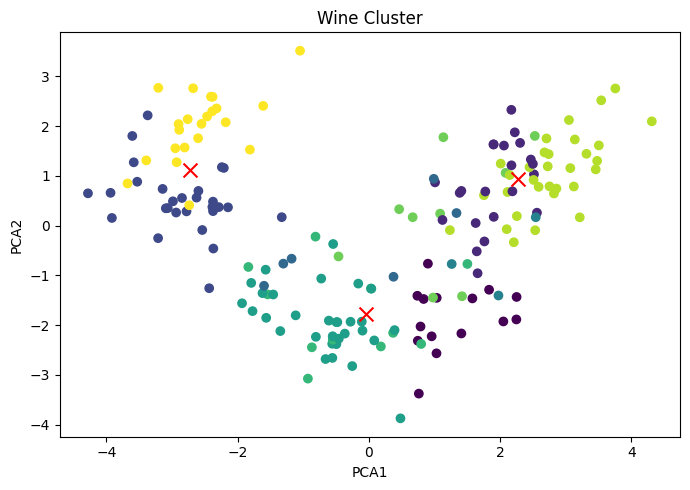

In [34]:
# Plot the clusters using first two features
plt.figure(figsize=(7,5))
plt.scatter(reduced['PCA1'],reduced['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()